## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [19]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

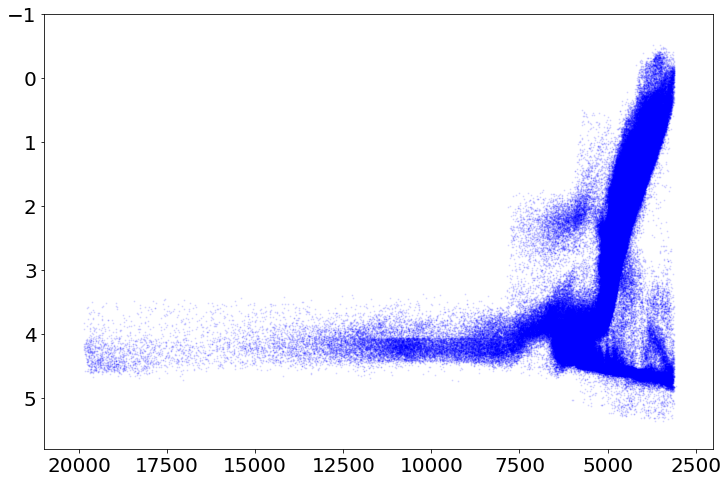

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.030, 0.019
POLY3: -0.041, -0.084, 0.006, 0.021
Sigmoid: -0.874, 24.448, 0.071, -0.055


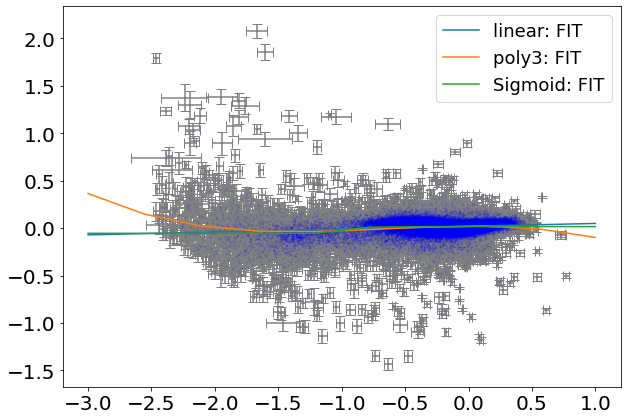

In [37]:
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

star = star[~np.isnan(star['FE_H'])]
star = star[~np.isnan(star['NI_FE'])]
star = star[~np.isnan(star['FE_H_ERR'])]
star = star[~np.isnan(star['NI_FE_ERR'])]

# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 60)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1], \
                          star['NI_FE_ERR'][cut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Me! Poly-fit 3 (4 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1], \
                         star['NI_FE_ERR'][cut1],p0=[2.5,1,1,0])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

sigA, sigB, sigC, sigD = mcFit4(sigmoid, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H_ERR'][cut1], \
                         star['NI_FE_ERR'][cut1],p0=[0,1,.1,0])
print(f'Sigmoid: {sigA:.3f}, {sigB:.3f}, {sigC:.3f}, {sigD:.3f}')

# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['FE_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['FE_H'][cut1]),star['NI_FE'][cut1], xerr=(star['FE_H_ERR'][cut1]),
             yerr=(star['NI_FE_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly3fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#Sigmoidfit
ax1.plot(x_plot,sigmoid(x_plot, sigA, sigB, sigC, sigD), label='Sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

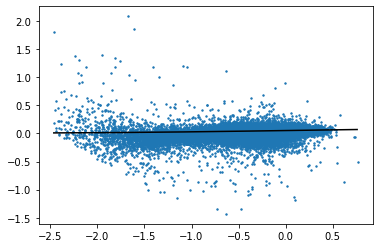

In [36]:
theta = (0,1,.1,0)
star['FE_H'][cut1]
dumb_x = np.arange(np.min(star['FE_H'][cut1]),np.max(star['FE_H'][cut1]),0.02)
plt.scatter(star['FE_H'][cut1],star['NI_FE'][cut1], s=2)
plt.plot(dumb_x,sigmoid(dumb_x, *theta), c='k')

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.000, 1.634
POLY2: 0.000, -0.001, 2.666


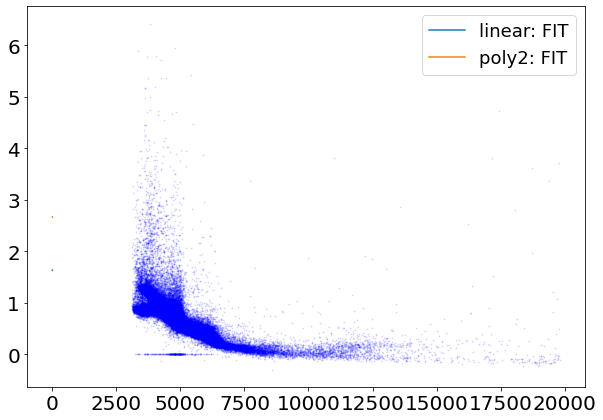

In [12]:
star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['J'])]
star = star[~np.isnan(star['K'])]
star = star[~np.isnan(star['TEFF_ERR'])]
star = star[~np.isnan(star['J_ERR'])]
star = star[~np.isnan(star['K_ERR'])]
(np.sqrt(star['J_ERR']**2 + star['K_ERR']**2)) 

# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['TEFF'][cut1], (star['J']-star['K'])[cut1],star['TEFF_ERR'][cut1] , \
                          (np.sqrt(star['J_ERR']**2 + star['K_ERR']**2)[cut1]), p0=[-5,2])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Me! Poly-fit 2 (4 parameter)
polyA, polyB, polyC = mcFit3(poly2, star['TEFF'][cut1], (star['J']-star['K'])[cut1], star['TEFF_ERR'][cut1], \
                         (np.sqrt(star['J_ERR']**2 + star['K_ERR']**2)[cut1]),p0=[-2.5,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

#logA, logB, logC,logD = mcFit4(logfit, star['TEFF'][cut1], (star['J']-star['K'])[cut1], star['TEFF_ERR'][cut1], \
#                         (np.sqrt(star['J_ERR']**2 + star['K_ERR']**2)[cut1]),p0=[-.4,9999999999999999999,9999,21.5])
#print(f'LOGFIT: {logA:.3f}, {logB:.3f}, {logC:.3f}, {logD:.3f}')
                              
# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut1],(star['J']-star['K'])[cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['TEFF'][cut1]),(star['J']-star['K'])[cut1], xerr=(star['TEFF_ERR'][cut1]),
#             yerr=(np.sqrt(star['J_ERR']**2 + star['K_ERR']**2)), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly2fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: FIT')
#Sigmoidfit
#ax1.plot(x_plot,logfit(x_plot, logA, logB, logC, logD), label='Logfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

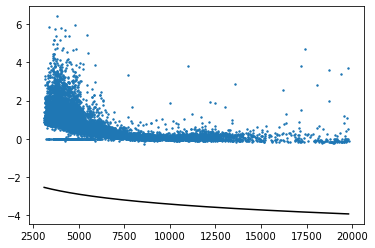

In [211]:
# def logfit(x,a,b,c,d):
#     return a*np.log(b*x + c) + d

theta = (-.75,2,0,4)
star['TEFF'][cut1]
dumb_x = np.arange(np.min(star['TEFF'][cut1]),np.max(star['TEFF'][cut1]),0.02)
plt.scatter(star['TEFF'][cut1],(star['J']-star['K'])[cut1], s=2)
plt.plot(dumb_x,logfit(dumb_x, *theta), c='k')

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].dat
star_hdus.close()

star = star[~np.isnan(star['GLON'])]
star = star[~np.isnan(star['VHELIO_AVG'])]
star = star[~np.isnan(star['VERR'])]

# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -10) | (star['GLAT'] < 10)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['GLON'][cut1], star['VHELIO_AVG'][cut1], \
                          star['VERR'][cut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Poly 3 fit
polyA, polyB, polyC, polyD = mcFit4(poly3, star['GLON'][cut1], star['VHELIO_AVG'][cut1], \
                         star['VERR'][cut1],p0=[2.5,1,1,0])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# Cos fit here
                          
cosA, cosB, cosC, cosD = mcFit4(cosfit, star['GLON'][cut1], star['VHELIO_AVG'][cut1], \
                         star['VERR'][cut1],p0=[2.5,1,1,0])

print(f'POLY3: {cosA:.3f}, {cosB:.3f}, {cosC:.3f}, {cosD:.3f}')                          
# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GLON'][cut1],star['VHELIO_AVG'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GLON'][cut1]),star['VHELIO_AVG'][cut1])

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly2fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC), label='poly2: FIT')
#Sigmoidfit
ax1.plot(x_plot,cosfit(x_plot, cosA, cosB, cosC, cosD), label='Cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [22]:
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
star_hdus.close()

star = star[~np.isnan(star['NVISTIS'])]
star = star[~np.isnan(star['VSCATTER'])]
star = star[~np.isnan(star['VERR'])]
# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['NVISTIS'] > 1)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['NVISTIS'][cut1], star['VSCATTER'][cut1], \
                          star['VERR'][cut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Poly 3 fit
polyA, polyB, polyC, polyD = mcFit4(poly3, star['NVISTIS'][cut1], star['VSCATTER'][cut1], \
                         star['VERR'][cut1],p0=[2.5,1,1,0])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# Cos fit here
def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d
                          
expA, expB, expC, expD = mcFit4(exponential, star['NVISTIS'][cut1], star['VSCATTER'][cut1], \
                         star['VERR'][cut1],p0=[2.5,1,1,0])

print(f'EXP: {ExpA:.3f}, {ExpB:.3f}, {ExpC:.3f}, {ExpD:.3f}')                          
# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['NVISTIS'][cut1],star['VSCATTER'][cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['GLON'][cut1]),star['VHELIO_AVG'][cut1])

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly2fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC), label='poly2: FIT')
#Sigmoidfit
ax1.plot(x_plot,exponential(x_plot, expA, expB, expC, expD), label='Exponential: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: 0.065, 0.833
POLY3: -0.000, -0.001, 0.102, 0.723


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [ ]:
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

star = star[~np.isnan(star['RA'])]
star = star[~np.isnan(star['GAIA_PMRA'])]
star = star[~np.isnan(star['GAIA_PMRA_ERROR'])]
# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['RA'][cut1], star['GAIA_PMRA'][cut1], \
                          star['GAIA_PMRA_ERROR'][cut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Poly 3 fit
polyA, polyB, polyC, polyD = mcFit4(poly3, star['RA'][cut1], star['GAIA_PMRA_ERROR'][cut1], \
                         star['GAIA_PMRA_ERROR'][cut1],p0=[2.5,1,1,0])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# Poly 3 fit
poly2A, poly2B, poly2C = mcFit3(poly2, star['RA'][cut1], star['GAIA_PMRA_ERROR'][cut1], \
                         star['GAIA_PMRA_ERROR'][cut1],p0=[2.5,1,1,0])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')                     
# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['RA'][cut1],star['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['GLON'][cut1]),star['VHELIO_AVG'][cut1])

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly2fit
ax1.plot(x_plot,poly2(x_plot, poly2A, poly2B, poly2C), label='poly2: FIT')
#Sigmoidfit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC,polyD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
star_hdus.close()

star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['TEFF_ERR'])]
star = star[~np.isnan(star['LOGG'])]
star = star[~np.isnan(star['LOGG_ERR'])]
# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['TEFF'] < 6000) & (star['LOGG'] <3)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['TEFF'][cut1], star['LOGG'][cut1],star['TEFF_ERR'][cut1] , \
                          star['LOGG_ERR'][cut1], p0=[-5,2])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Poly 3 fit
polyA, polyB, polyC, polyD = mcFit4(poly3, star['TEFF'][cut1], star['LOGG'][cut1],star['TEFF_ERR'][cut1] , \
                          star['LOGG_ERR'][cut1], p0=[-5,2])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# Poly 3 fit
polyA, polyB, polyC = mcFit3(poly2, star['TEFF'][cut1], star['LOGG'][cut1],star['TEFF_ERR'][cut1] , \
                          star['LOGG_ERR'][cut1], p0=[-5,2])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')                     
# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut1],star['LOGG'][cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['GLON'][cut1]),star['VHELIO_AVG'][cut1])

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly2fit
ax1.plot(x_plot,poly2(x_plot, poly2A, poly2B, poly2C), label='poly2: FIT')
#Sigmoidfit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC,polyD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
star_hdus.close()

star = star[~np.isnan(star['GAIA_PARALLAX'])]
star = star[~np.isnan(star['GAIA_PARALLAX_ERROR'])]
star = star[~np.isnan(star['GAIA_PMRA'])]
star = star[~np.isnan(star['GAIA_PMRA_ERROR'])]
# Plan: Strategically copy and paste above example with some edits


# First got to cut any bad data >:)
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
cut1 = np.where(ct1)[0]
# Next, going to copy in the fits from the above example:

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1],star['GAIA_PARALLAX_ERROR'][cut1] , \
                          star['GAIA_PMRA_ERROR'][cut1], p0=[-5,2])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

# Poly 3 fit
polyA, polyB, polyC, polyD = mcFit4(poly3, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1],star['GAIA_PARALLAX_ERROR'][cut1] , \
                          star['GAIA_PMRA_ERROR'][cut1], p0=[-5,2])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# Poly 3 fit
polyA, polyB, polyC = mcFit3(poly2, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1],star['GAIA_PARALLAX_ERROR'][cut1] , \
                          star['GAIA_PMRA_ERROR'][cut1], p0=[-5,2])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')                     
# Now it's graphin' time

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['GAIA_PARALLAX'][cut1],star['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['GLON'][cut1]),star['VHELIO_AVG'][cut1])

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#Poly2fit
ax1.plot(x_plot,poly2(x_plot, poly2A, poly2B, poly2C), label='poly2: FIT')
#Sigmoidfit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC,polyD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()